In [1]:
%matplotlib nbagg
#%load_ext line_profiler
#%load_ext memory_profiler

import jungfrau_utils as ju
import numpy as np
import json
import os, math
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py
from ipyfilechooser import FileChooser

from alvra_tools import *
from alvra_tools.channels import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm, threshold
import glob

## First load a few images to identify ROIs and check threshold

In [2]:
data = SFDataFiles('/sf/alvra/data/p18938/raw/XES_jet_FeBpy_001/run_001730.*')
nframes = 10
threshold_low = 5

##################################################################
clock = Clock()
total = 0
total_thr = 0
ch_JF = data['JF02T09V02']
images = ch_JF.data[:nframes]

print ('Loaded {} images'.format(images.shape[0]))

for i in range(nframes):
    single_image = images[i, :]
    image_thr = single_image.copy()
    image_thr[single_image < threshold_low] = 0
    total_thr += image_thr
    total += single_image
    #total /= nframes

print ("It took", clock.tick(), "seconds to process this file")

Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18938/raw/JF_pedestals/run_000870.JF02T09V02.res.h5
jungfrau file: 20:00 07.02.2021
pedestal file: 12:20 07.02.2021
    mtime difference: 7:40:10.360263
Loaded 10 images
It took 34.96 seconds to process this file


<IPython.core.display.Javascript object>


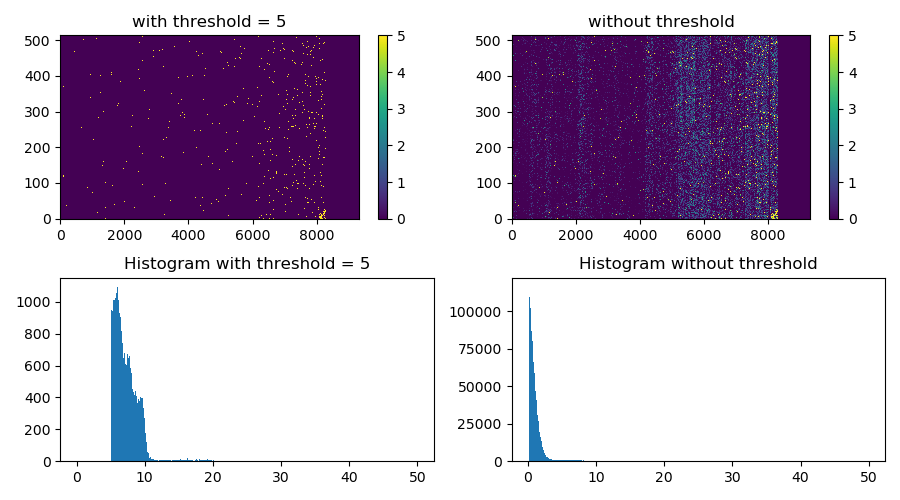

In [3]:
plt.figure(figsize=(9,5))
plt.subplots_adjust(wspace=0.5)
plt.subplot(221)
plt.imshow(total_thr, origin="lower", aspect='auto', vmin=0, vmax=5)
plt.title("with threshold = {}".format(threshold_low))
plt.colorbar()
plt.subplot(222)
plt.imshow(total, origin="lower", aspect='auto', vmin=0, vmax=5)
plt.title("without threshold")
plt.colorbar()
plt.subplot(224)
plt.title("Histogram without threshold")
plt.hist(total.ravel(), bins=np.arange(0.1,50,0.1))
plt.subplot(223)
plt.title("Histogram with threshold = {}".format(threshold_low))
plt.hist(total_thr.ravel(), bins=np.arange(0.1,50,0.1))
plt.tight_layout()
plt.show()

## Next cells for a single file, ONLY JF file!

In [4]:
DIR = '/sf/alvra/data/p18938/raw/XES_jet_FeBpy_001/'
run = 'run_001730'

In [5]:
roi1 = (7740, 7880, 290, 340) #signal 1
roi2 = (7740, 7880, 385, 435) #bkg 1

roi3 = (5080, 5220, 210, 250) #signal 2
roi4 = (5080, 5220, 145, 185) #bkg 2

threshold_low = 5

######################################################################################
clock = Clock()
JF_single_file = DIR + run + '.JF02T09V02.h5'

print("Processing file %s" % (JF_single_file))

nshots = None  # put this to None for ALL images

images_pump_roi1, images_pump_roi2, images_pump_roi3, images_pump_roi4, pids_ON, \
images_unpump_roi1, images_unpump_roi2, images_unpump_roi3, images_unpump_roi4, pids_OFF = \
load_crop_JF_batches_on_off_4rois(JF_single_file, roi1, roi2, roi3, roi4, 100, 50, nshots=nshots)

images_pump_roi1_thr = images_pump_roi1.copy()
images_pump_roi1_thr[images_pump_roi1 < threshold_low] = 0
#images_pump_roi1_thr[images_pump_roi1 > threshold_high] = 0
images_unpump_roi1_thr = images_unpump_roi1.copy()
images_unpump_roi1_thr[images_unpump_roi1 < threshold_low] = 0
#images_unpump_roi1_thr[images_unpump_roi1 > threshold_high] = 0

images_pump_roi2_thr = images_pump_roi2.copy()
images_pump_roi2_thr[images_pump_roi2 < threshold_low] = 0
#images_pump_roi2_thr[images_pump_roi2 > threshold_high] = 0
images_unpump_roi2_thr = images_unpump_roi2.copy()
images_unpump_roi2_thr[images_unpump_roi2 < threshold_low] = 0
#images_unpump_roi2_thr[images_unpump_roi2 > threshold_high] = 0

images_pump_roi3_thr = images_pump_roi3.copy()
images_pump_roi3_thr[images_pump_roi3 < threshold_low] = 0
#images_pump_roi3_thr[images_pump_roi3 > threshold_high] = 0
images_unpump_roi3_thr = images_unpump_roi3.copy()
images_unpump_roi3_thr[images_unpump_roi3 < threshold_low] = 0
#images_unpump_roi3_thr[images_unpump_roi3 > threshold_high] = 0

images_pump_roi4_thr = images_pump_roi4.copy()
images_pump_roi4_thr[images_pump_roi4 < threshold_low] = 0
#images_pump_roi4_thr[images_pump_roi4 > threshold_high] = 0
images_unpump_roi4_thr = images_unpump_roi4.copy()
images_unpump_roi4_thr[images_unpump_roi4 < threshold_low] = 0
#images_unpump_roi4_thr[images_unpump_roi4 > threshold_high] = 0

print ("It took", clock.tick(), "seconds to process this file")

Processing file /sf/alvra/data/p18938/raw/XES_jet_FeBpy_001/run_001730.JF02T09V02.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18938/raw/JF_pedestals/run_000870.JF02T09V02.res.h5
jungfrau file: 20:00 07.02.2021
pedestal file: 12:20 07.02.2021
    mtime difference: 7:40:10.360263
Total images = 6000, load them in batches of 1000
Load batch = slice(0, 1000, None)
Load batch = slice(1000, 2000, None)
Load batch = slice(2000, 3000, None)
Load batch = slice(3000, 4000, None)
Load batch = slice(4000, 5000, None)
Load batch = slice(5000, 6000, None)
It took 33.34 seconds to process this file


In [6]:
spectrum_ON_roi1 = 0
spectrum_ON_roi2 = 0
spectrum_ON_roi3 = 0
spectrum_ON_roi4 = 0
spectrum_OFF_roi1 = 0
spectrum_OFF_roi2 = 0
spectrum_OFF_roi3 = 0
spectrum_OFF_roi4 = 0

spectrum_ON_roi1 = images_pump_roi1_thr.sum(axis = 1).sum(axis = 0)# - images_pump_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_ON_roi2 = images_pump_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_ON_roi3 = images_pump_roi3_thr.sum(axis = 1).sum(axis = 0)# - images_pump_roi4_thr.sum(axis = 1).sum(axis = 0)
spectrum_ON_roi4 = images_pump_roi4_thr.sum(axis = 1).sum(axis = 0)

spectrum_OFF_roi1 = images_unpump_roi1_thr.sum(axis = 1).sum(axis = 0)# - images_unpump_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_OFF_roi2 = images_unpump_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_OFF_roi3 = images_unpump_roi3_thr.sum(axis = 1).sum(axis = 0)# - images_unpump_roi4_thr.sum(axis = 1).sum(axis = 0)
spectrum_OFF_roi4 = images_unpump_roi4_thr.sum(axis = 1).sum(axis = 0)

<IPython.core.display.Javascript object>


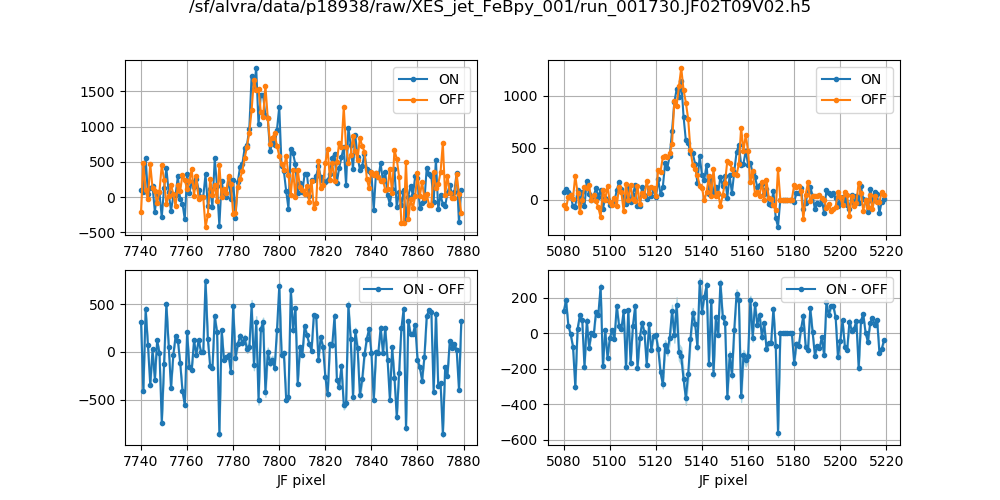

In [8]:
from textwrap import wrap
bin1_ = 1  # change the bin size if wanted, 1 is every pixel
bin3_ = 1  # change the bin size if wanted, 1 is every pixel

spectra_on1 = spectrum_ON_roi1 - spectrum_ON_roi2       #bkg subtraction roi1 ON 
spectra_off1 = spectrum_OFF_roi1 - spectrum_OFF_roi2    #bkg subtraction roi1 OFF
spectra_on3 = spectrum_ON_roi3 - spectrum_ON_roi4       #bkg subtraction roi3 ON 
spectra_off3 = spectrum_OFF_roi3 - spectrum_OFF_roi4    #bkg subtraction roi3 OFF

x_axis1 = np.arange(roi1[0], roi1[1])
x_axis3 = np.arange(roi3[0], roi3[1])

spectra_on_rebin1  = bin_sum(spectra_on1,  bin1_)
spectra_off_rebin1 = bin_sum(spectra_off1, bin1_)
x_axis_rebin1 = bin_mean(x_axis1, bin1_)
spectra_on_rebin3  = bin_sum(spectra_on3,  bin3_)
spectra_off_rebin3 = bin_sum(spectra_off3, bin3_)
x_axis_rebin3 = bin_mean(x_axis3, bin3_)

spectra_on_err1  = np.sqrt(abs(spectra_on_rebin1))
spectra_off_err1 = np.sqrt(abs(spectra_off_rebin1))
spectra_on_err3  = np.sqrt(abs(spectra_on_rebin3))
spectra_off_err3 = np.sqrt(abs(spectra_off_rebin3))

low_err1= (spectra_on_rebin1 - spectra_off_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
high_err1= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
low_err3= (spectra_on_rebin3 - spectra_off_rebin3)-np.sqrt(spectra_on_err3**2+spectra_off_err3**2)
high_err3= (spectra_on_rebin3 - spectra_off_rebin3)+np.sqrt(spectra_on_err3**2+spectra_off_err3**2)

plt.figure(figsize=(10,5))
plt.suptitle(JF_single_file, y = 1)

plt.subplot(221)

#plt.gca().set_title("\n".join(wrap('ROI1: {} Energy = {} eV'.format(roi1, np.round(Energy_eV_single, 2)),30)))
#plt.gca().set_title('ROI1: [], Delay = {} ps'.format(roi1, np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin1, spectra_on_rebin1, label="ON", marker='.')
plt.plot(x_axis_rebin1, spectra_off_rebin1, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(223)
plt.plot(x_axis_rebin1,spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
plt.fill_between(x_axis_rebin1, low_err1, high_err1, color='lightblue')
plt.legend(loc="best")
plt.xlabel("JF pixel")
plt.grid()

plt.subplot(222)
#plt.gca().set_title("\n".join(wrap('ROI2: {} Energy = {} eV'.format(roi2, np.round(Energy_eV_single, 2)),30)))
#plt.gca().set_title('ROI2: [], Delay = {} ps'.format(roi2, np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin3, spectra_on_rebin3, label="ON", marker='.')
plt.plot(x_axis_rebin3, spectra_off_rebin3, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(224)
plt.plot(x_axis_rebin3,spectra_on_rebin3 - spectra_off_rebin3, label="ON - OFF",marker='.')
plt.fill_between(x_axis_rebin3, low_err3, high_err3, color='lightblue')
plt.legend(loc="best")
plt.xlabel("JF pixel")
plt.grid()

plt.show()

## Next cells for a single file, any channel (BSDATA & JF) 

In [9]:
# Choose a pedestal file (usually located in /sf/alvra/data/*pgroup*/res/JF_pedestals) 
# if you do not want to use the closest in time

# pedestal_file = "/sf/alvra/data/p17983/res/JF_pedestals/pedestal_20190727_2115.JF02T09V02.res.h5"
pedestal_file = None

In [10]:
data = SFDataFiles('/sf/alvra/data/p18938/raw/XES_jet_FeBpy_001/run_001730.*')

channel_list_pp = [channel_Events, channel_energy, channel_PIPS_fluo, 'JF02T09V02']
channel_list_all = channel_list_pp

roi1 = (7740, 7880, 290, 340) #signal 1
roi2 = (7740, 7880, 385, 435) #bkg 1

roi3 = (5080, 5220, 210, 250) #signal 2
roi4 = (5080, 5220, 145, 185) #bkg 2

threshold_low = 5

##########################################################
clock = Clock()

print (data.fnames[0])

#results = load_data_compact_laser_pump(channel_list, data)
resultsPP, results, _, _ = load_data_compact_laser_pump_JF(channel_list_pp, channel_list_all, data, roi1, roi2, roi3, roi4)

data.close()

Data_fluo_pump = resultsPP[channel_PIPS_fluo].pump
Data_fluo_unpump = resultsPP[channel_PIPS_fluo].unpump
images_pump_roi1 = resultsPP['JFroi1'].pump
images_unpump_roi1 = resultsPP['JFroi1'].unpump
images_pump_roi2 = resultsPP['JFroi2'].pump
images_unpump_roi2 = resultsPP['JFroi2'].unpump
images_pump_roi3 = resultsPP['JFroi3'].pump
images_unpump_roi3 = resultsPP['JFroi3'].unpump
images_pump_roi4 = resultsPP['JFroi4'].pump
images_unpump_roi4 = resultsPP['JFroi4'].unpump

Energy_eV_single = resultsPP[channel_energy].pump[0]

#print (images_pump.shape, images_unpump.shape)

images_pump_roi1_thr = images_pump_roi1.copy()
images_pump_roi1_thr[images_pump_roi1 < threshold_low] = 0
#images_pump_roi1_thr[images_pump_roi1 > threshold_high] = 0
images_unpump_roi1_thr = images_unpump_roi1.copy()
images_unpump_roi1_thr[images_unpump_roi1 < threshold_low] = 0
#images_unpump_roi1_thr[images_unpump_roi1 > threshold_high] = 0

images_pump_roi2_thr = images_pump_roi2.copy()
images_pump_roi2_thr[images_pump_roi2 < threshold_low] = 0
#images_pump_roi2_thr[images_pump_roi2 > threshold_high] = 0
images_unpump_roi2_thr = images_unpump_roi2.copy()
images_unpump_roi2_thr[images_unpump_roi2 < threshold_low] = 0
#images_unpump_roi2_thr[images_unpump_roi2 > threshold_high] = 0

images_pump_roi3_thr = images_pump_roi3.copy()
images_pump_roi3_thr[images_pump_roi3 < threshold_low] = 0
#images_pump_roi3_thr[images_pump_roi3 > threshold_high] = 0
images_unpump_roi3_thr = images_unpump_roi3.copy()
images_unpump_roi3_thr[images_unpump_roi3 < threshold_low] = 0
#images_unpump_roi3_thr[images_unpump_roi3 > threshold_high] = 0

images_pump_roi4_thr = images_pump_roi4.copy()
images_pump_roi4_thr[images_pump_roi4 < threshold_low] = 0
#images_pump_roi4_thr[images_pump_roi4 > threshold_high] = 0
images_unpump_roi4_thr = images_unpump_roi4.copy()
images_unpump_roi4_thr[images_unpump_roi4 < threshold_low] = 0
#images_unpump_roi4_thr[images_unpump_roi4 > threshold_high] = 0

print ("It took", clock.tick(), "seconds to process this file")

Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18938/raw/JF_pedestals/run_000870.JF02T09V02.res.h5
jungfrau file: 20:00 07.02.2021
pedestal file: 12:20 07.02.2021
    mtime difference: 7:40:10.360263
/sf/alvra/data/p18938/raw/XES_jet_FeBpy_001/run_001730.BSDATA.h5

--------------------------------------------------------------------------------

JF02T09V02                        6000 / 6000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet           6000 / 6000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET          5999 / 6000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS 6000 / 6000 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 5999 / 6000 -> 0% loss
complete channels: 3 / 4 -> 25% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1
Loaded 2998 pump and 2998 unpump shots
It took 180.02 seconds to process this

In [8]:
spectrum_ON_roi1 = 0
spectrum_ON_roi2 = 0
spectrum_ON_roi3 = 0
spectrum_ON_roi4 = 0
spectrum_OFF_roi1 = 0
spectrum_OFF_roi2 = 0
spectrum_OFF_roi3 = 0
spectrum_OFF_roi4 = 0

spectrum_ON_roi1 = images_pump_roi1_thr.sum(axis = 1).sum(axis = 0)
spectrum_ON_roi2 = images_pump_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_ON_roi3 = images_pump_roi3_thr.sum(axis = 1).sum(axis = 0)
spectrum_ON_roi4 = images_pump_roi4_thr.sum(axis = 1).sum(axis = 0)

spectrum_OFF_roi1 = images_unpump_roi1_thr.sum(axis = 1).sum(axis = 0)
spectrum_OFF_roi2 = images_unpump_roi2_thr.sum(axis = 1).sum(axis = 0)
spectrum_OFF_roi3 = images_unpump_roi3_thr.sum(axis = 1).sum(axis = 0)
spectrum_OFF_roi4 = images_unpump_roi4_thr.sum(axis = 1).sum(axis = 0)

-0.00030000000000000003

<IPython.core.display.Javascript object>


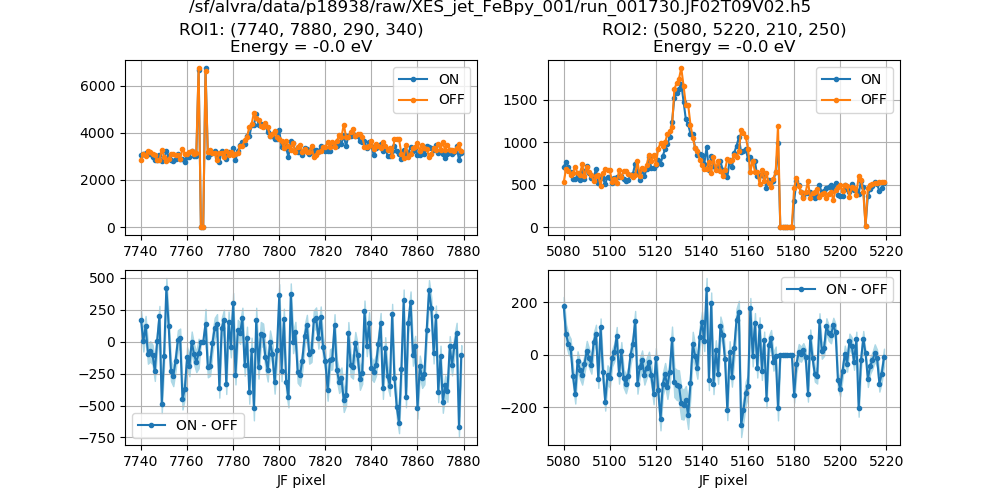

In [15]:
from textwrap import wrap
bin1_ = 1  # change the bin size if wanted, 1 is every pixel
bin3_ = 1  # change the bin size if wanted, 1 is every pixel

spectra_on1 = spectrum_ON_roi1 - spectrum_ON_roi2       #bkg subtraction roi1 ON 
spectra_off1 = spectrum_OFF_roi1 - spectrum_OFF_roi2    #bkg subtraction roi1 OFF
spectra_on3 = spectrum_ON_roi3 - spectrum_ON_roi4       #bkg subtraction roi3 ON 
spectra_off3 = spectrum_OFF_roi3 - spectrum_OFF_roi4    #bkg subtraction roi3 OFF

x_axis1 = np.arange(roi1[0], roi1[1])
x_axis3 = np.arange(roi3[0], roi3[1])

spectra_on_rebin1  = bin_sum(spectra_on1,  bin1_)
spectra_off_rebin1 = bin_sum(spectra_off1, bin1_)
x_axis_rebin1 = bin_mean(x_axis1, bin1_)
spectra_on_rebin3  = bin_sum(spectra_on3,  bin3_)
spectra_off_rebin3 = bin_sum(spectra_off3, bin3_)
x_axis_rebin3 = bin_mean(x_axis3, bin3_)

spectra_on_err1  = np.sqrt(abs(spectra_on_rebin1))
spectra_off_err1 = np.sqrt(abs(spectra_off_rebin1))
spectra_on_err3  = np.sqrt(abs(spectra_on_rebin3))
spectra_off_err3 = np.sqrt(abs(spectra_off_rebin3))

low_err1= (spectra_on_rebin1 - spectra_off_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
high_err1= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
low_err3= (spectra_on_rebin3 - spectra_off_rebin3)-np.sqrt(spectra_on_err3**2+spectra_off_err3**2)
high_err3= (spectra_on_rebin3 - spectra_off_rebin3)+np.sqrt(spectra_on_err3**2+spectra_off_err3**2)

plt.figure(figsize=(10,5))
plt.suptitle(JF_single_file, y = 1)

plt.subplot(221)

#plt.gca().set_title("\n".join(wrap('ROI1: {} Energy = {} eV'.format(roi1, np.round(Energy_eV_single, 2)),30)))
#plt.gca().set_title('ROI1: [], Delay = {} ps'.format(roi1, np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin1, spectra_on_rebin1, label="ON", marker='.')
plt.plot(x_axis_rebin1, spectra_off_rebin1, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(223)
plt.plot(x_axis_rebin1,spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
plt.fill_between(x_axis_rebin1, low_err1, high_err1, color='lightblue')
plt.legend(loc="best")
plt.xlabel("JF pixel")
plt.grid()

plt.subplot(222)
#plt.gca().set_title("\n".join(wrap('ROI2: {} Energy = {} eV'.format(roi2, np.round(Energy_eV_single, 2)),30)))
#plt.gca().set_title('ROI2: [], Delay = {} ps'.format(roi2, np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin3, spectra_on_rebin3, label="ON", marker='.')
plt.plot(x_axis_rebin3, spectra_off_rebin3, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(224)
plt.plot(x_axis_rebin3,spectra_on_rebin3 - spectra_off_rebin3, label="ON - OFF",marker='.')
plt.fill_between(x_axis_rebin3, low_err3, high_err3, color='lightblue')
plt.legend(loc="best")
plt.xlabel("JF pixel")
plt.grid()

plt.show()

## Next cells for scans, ONLY JF file!

In [2]:
fc = FileChooser('/sf/alvra/data/p18442/res/scan_info')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p18442/res/scan_info', filename='', show_hidden='False')

In [12]:
roi1 = (5000, 5150, 220, 290) # Ru La ROIs
roi2 = (5000, 5150, 290, 360) 

#roi3 = (6450, 6550, 220, 300)
#roi4 = (5450, 5700, 220, 300)

threshold_low = 2.0
threshold_high = 10

######################################################################################

json_file = fc.selected
scan_data = load_scan_data(json_file)

Energy_eV = []
Delay_mm = []
XAS_roi1 = []
XAS_roi1_on = []
#Error_XAS_roi1 = []
XAS_roi2 = []
XAS_roi2_on = []
#Error_XAS_roi2 = []
RIXS_transient_roi1 = []
RIXS_transient_roi2 = []
Error_transient_roi1 = []
Error_transient_roi2 = []
RIXS_unpumped_roi1 = []
RIXS_unpumped_roi2 = []
Error_unpumped_roi1 = []
Error_unpumped_roi2 = []
RIXS_pumped_roi1 = []
RIXS_pumped_roi2 = []
Error_pumped_roi1 = []
Error_pumped_roi2 = []
XAS_transient_roi1=[]
XES_transient_roi1 =[]
XAS_transient_roi2=[]
XES_transient_roi2 =[]

#XES_1D = []

clock = Clock()
num_scan_files = len(scan_data)
print("\nProcessing", num_scan_files, "total files")

for i, (bs, fn) in enumerate(scan_data):
#for i in range(0,4):
    print("\n File {} out of {}: Processing {}".format(i+1, num_scan_files, fn.split('/')[-2:]))
    
    spectrum_ON_roi1 = 0
    spectrum_OFF_roi1 = 0
    spectrum_ON_roi2 = 0
    spectrum_OFF_roi2 = 0
    
    nshots = 1000  # put this to None for ALL images
    #nshots = None
    
    
    images_pump_roi1, images_pump_roi2, pids_ON, images_unpump_roi1, images_unpump_roi2, pids_OFF = \
    load_crop_JF_batches_on_off_2rois(fn, roi1, roi2, 50, 25, nshots=nshots)
    
#   images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
#   load_crop_JF_data_on_off(fn, roi1, roi2, 50, 25, pedestal_file=pedestal_file, nshots=nshots)
    
    energy, pids = load_single_channel_pulseID(bs, channel_energy, 50)
    energy = [x for x in energy if (x > 0)]
    Energy_eV.append(np.mean(energy))
    
    delay, pids = load_single_channel_pulseID(bs, channel_delay_topas, 50)
    delay = [x for x in delay if (x > 0)]
    Delay_mm.append(np.mean(delay))
    
    images_pump_roi1_thr = images_pump_roi1.copy()
    images_pump_roi1_thr[images_pump_roi1 < threshold_low] = 0
    images_pump_roi1_thr[images_pump_roi1 > threshold_high] = 0
    
    images_unpump_roi1_thr = images_unpump_roi1.copy()
    images_unpump_roi1_thr[images_unpump_roi1 < threshold_low] = 0
    images_unpump_roi1_thr[images_unpump_roi1 > threshold_high] = 0
    
    images_pump_roi2_thr = images_pump_roi2.copy()
    images_pump_roi2_thr[images_pump_roi2 < threshold_low] = 0
    images_pump_roi2_thr[images_pump_roi2 > threshold_high] = 0
    
    images_unpump_roi2_thr = images_unpump_roi2.copy()
    images_unpump_roi2_thr[images_unpump_roi2 < threshold_low] = 0
    images_unpump_roi2_thr[images_unpump_roi2 > threshold_high] = 0
    
    spectrum_ON_roi1 = images_ON_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = images_OFF_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2 = images_ON_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = images_OFF_roi2_thr.sum(axis = 1).sum(axis = 0)

######################### ROI 1 ##############################################
    
    XAS_roi1.append(np.abs(spectrum_OFF_roi1.sum()))
    XAS_roi1_on.append(np.abs(spectrum_ON_roi1.sum()))
    RIXS_unpumped_roi1.append(spectrum_OFF_roi1)
    Error_unpumped_roi1.append(np.sqrt(spectrum_OFF_roi1))
    RIXS_pumped_roi1.append(spectrum_ON_roi1)
    Error_pumped_roi1.append(np.sqrt(spectrum_ON_roi1))
    RIXS_transient_roi1.append(spectrum_ON_roi1 - spectrum_OFF_roi1)
    Error_transient_roi1.append(np.sqrt((np.sqrt(spectrum_ON_roi1))**2 + (np.sqrt(spectrum_OFF_roi1))**2))
    
    XES_transient_roi1.append(np.abs(spectrum_ON_roi1 - spectrum_OFF_roi1))
 #   XES_1D.append(np.sum(XES_transient_roi1, axis = 1))
    
    XAS_transient_roi1.append(np.abs(np.sum(RIXS_transient_roi1)))
    
######################### ROI 2 ##############################################
    
    XAS_roi2.append(np.abs(spectrum_OFF_roi2.sum()))
    XAS_roi2_on.append(np.abs(spectrum_ON_roi2.sum()))
    RIXS_unpumped_roi2.append(spectrum_OFF_roi2)
    Error_unpumped_roi2.append(np.sqrt(spectrum_OFF_roi2))
    RIXS_pumped_roi2.append(spectrum_ON_roi2)
    Error_pumped_roi2.append(np.sqrt(spectrum_ON_roi2))
    RIXS_transient_roi2.append(spectrum_ON_roi2 - spectrum_OFF_roi2)
    Error_transient_roi2.append(np.sqrt((np.sqrt(spectrum_ON_roi2))**2 + (np.sqrt(spectrum_OFF_roi2))**2))
    
    XES_transient_roi2.append(np.abs(spectrum_ON_roi2 - spectrum_OFF_roi2))
#    XES_1D.append(np.sum(XES_transient_roi2, axis = 1))
    
    XAS_transient_roi2.append(np.abs(np.sum(RIXS_transient_roi2)))
    clear_output(wait=True)
    
    print ("It took {} to process file {}".format(clock.tick(), fn.split('/')[-1]))

Energy_eV = np.array(Energy_eV)
Delay_mm = np.array(Delay_mm)
XAS_roi1 = np.array(XAS_roi1)
XAS_roi1_on = np.array(XAS_roi1_on)
RIXS_unpumped_roi1 = np.array(RIXS_unpumped_roi1)
Error_unpumped_roi1 = np.array(Error_unpumped_roi1)
RIXS_pumped_roi1 = np.array(RIXS_pumped_roi1)
Error_pumped_roi1 = np.array(Error_pumped_roi1)
RIXS_transient_roi1 = np.array(RIXS_transient_roi1)
Error_transient_roi1 = np.array(Error_transient_roi1)
XAS_transient_roi1=np.array(XAS_transient_roi1)
XES_transient_roi1=np.array(XES_transient_roi1)
#XES_1D=np.array(XES_1D)
XAS_roi2 = np.array(XAS_roi2)
XAS_roi2_on = np.array(XAS_roi2_on)
RIXS_unpumped_roi2 = np.array(RIXS_unpumped_roi2)
Error_unpumped_roi2 = np.array(Error_unpumped_roi2)
RIXS_pumped_roi2 = np.array(RIXS_pumped_roi2)
Error_pumped_roi2 = np.array(Error_pumped_roi2)
RIXS_transient_roi2 = np.array(RIXS_transient_roi2)
Error_transient_roi2 = np.array(Error_transient_roi2)
XAS_transient_roi2=np.array(XAS_transient_roi2)
XES_transient_roi2=np.array(XES_transient_roi2)
#XES_1D=np.array(XES_1D)

print ("\nJob done! It took", clock.tock(), "seconds to process", num_scan_files, "file(s)")



It took 6.07 to process file run_001514.JF02T09V02.h5

Job done! It took 129.15 seconds to process 21 file(s)


<IPython.core.display.Javascript object>


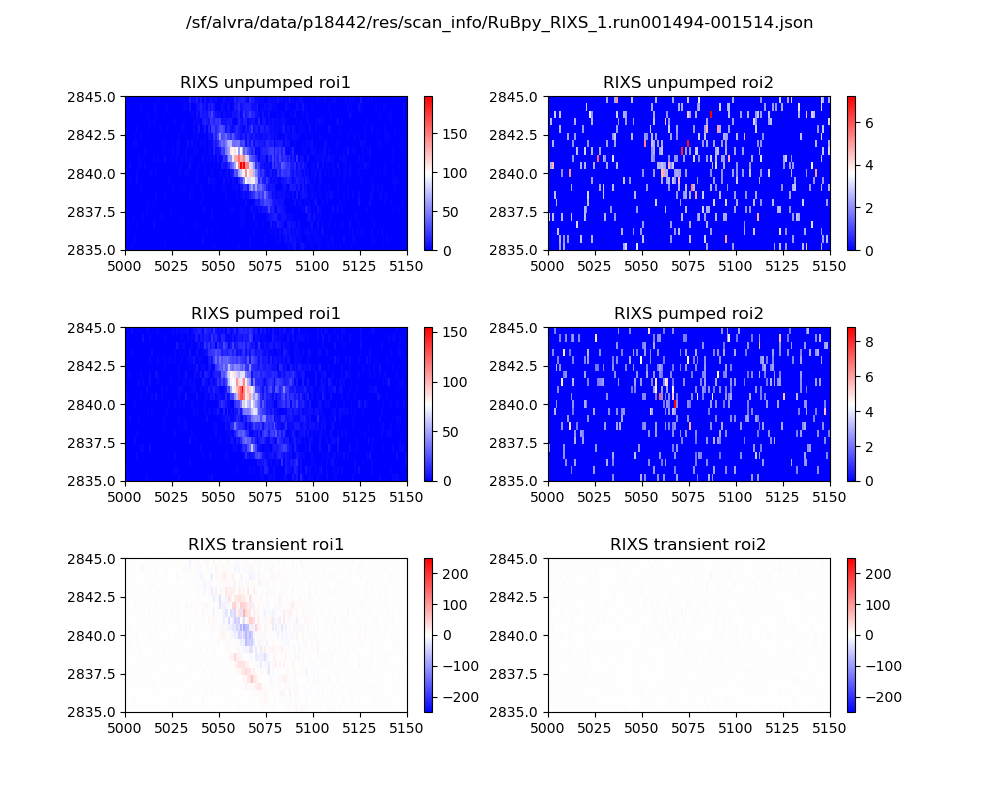

In [10]:
plt.figure(figsize=(10,8))
plt.suptitle(fc.selected)
plt.subplots_adjust(hspace=0.5)

plt.subplot(321)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS unpumped roi1")
plt.colorbar()

plt.subplot(322)
plt.imshow(RIXS_unpumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS unpumped roi2")
plt.colorbar()

plt.subplot(323)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS pumped roi1")
plt.colorbar()

plt.subplot(324)
plt.imshow(RIXS_pumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS pumped roi2")
plt.colorbar()

plt.subplot(325)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi1")
plt.colorbar()

plt.subplot(326)
plt.imshow(RIXS_transient_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi2")
plt.colorbar()



plt.show()

## Next cells for an energy scan, any channel (BSDATA & JF) 

In [2]:
fc = FileChooser('/sf/alvra/data/p18442/res/scan_info')
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p18442/res/scan_info', filename='', show_hidden='False')

In [ ]:
channel_list_pp = [channel_Events, channel_PIPS_fluo, 'JF02T09V02']
channel_list_all = channel_list_pp

roi1 = (5000, 5150, 220, 290) # Ru La ROIs
roi2 = (5000, 5150, 290, 360) 

roi3 = (6450, 6451, 220, 221)
roi4 = (6450, 6451, 220, 221)

threshold_low = 2.0

####################################################################################################3
clock = Clock()
from sfdata import SFScanInfo
scan = SFScanInfo(fc.selected)
xaxis = scan.readbacks

XAS_roi1 = []
XAS_roi1_on = []
#Error_XAS_roi1 = []
XAS_roi2 = []
XAS_roi2_on = []
#Error_XAS_roi2 = []
RIXS_transient_roi1 = []
RIXS_transient_roi2 = []
Error_transient_roi1 = []
Error_transient_roi2 = []
RIXS_unpumped_roi1 = []
RIXS_unpumped_roi2 = []
Error_unpumped_roi1 = []
Error_unpumped_roi2 = []
RIXS_pumped_roi1 = []
RIXS_pumped_roi2 = []
Error_pumped_roi1 = []
Error_pumped_roi2 = []
XAS_transient_roi1=[]
XES_transient_roi1 =[]
XAS_transient_roi2=[]
XES_transient_roi2 =[]

for i, step in enumerate(scan):
    check_files_and_data(step)
    clear_output(wait=True)
    filename = scan.files[i][0].split('/')[-1].split('.')[0]
    print ('Step {} of {}: Processing {}'.format(i+1, len(scan.files), filename))
    
    spectrum_ON_roi1 = 0
    spectrum_OFF_roi1 = 0
    spectrum_ON_roi2 = 0
    spectrum_OFF_roi2 = 0
    
    resultsPP, results, _, _ = load_data_compact_laser_pump_JF(channel_list_pp, channel_list_all, step, roi1, roi2, roi3, roi4)

    Data_fluo_pump = resultsPP[channel_PIPS_fluo].pump
    Data_fluo_unpump = resultsPP[channel_PIPS_fluo].unpump
    images_pump_roi1 = resultsPP['JFroi1'].pump
    images_unpump_roi1 = resultsPP['JFroi1'].unpump
    images_pump_roi2 = resultsPP['JFroi2'].pump
    images_unpump_roi2 = resultsPP['JFroi2'].unpump
    #images_pump_roi3 = resultsPP['JFroi3'].pump
    #images_unpump_roi3 = resultsPP['JFroi3'].unpump
    #images_pump_roi4 = resultsPP['JFroi4'].pump
    #images_unpump_roi4 = resultsPP['JFroi4'].unpump
    
 #   Delay_mm_single = resultsPP[channel_delay_topas].pump[0]
    
    images_pump_roi1_thr = images_pump_roi1.copy()
    images_pump_roi1_thr[images_pump_roi1 < threshold_low] = 0
    #images_pump_roi1_thr[images_pump_roi1 > threshold_high] = 0
    images_unpump_roi1_thr = images_unpump_roi1.copy()
    images_unpump_roi1_thr[images_unpump_roi1 < threshold_low] = 0
    #images_unpump_roi1_thr[images_unpump_roi1 > threshold_high] = 0
    
    images_pump_roi2_thr = images_pump_roi2.copy()
    images_pump_roi2_thr[images_pump_roi2 < threshold_low] = 0
    #images_pump_roi2_thr[images_pump_roi2 > threshold_high] = 0
    images_unpump_roi2_thr = images_unpump_roi2.copy()
    images_unpump_roi2_thr[images_unpump_roi2 < threshold_low] = 0
    #images_unpump_roi2_thr[images_unpump_roi2 > threshold_high] = 0
    
    #images_pump_roi3_thr = images_pump_roi3.copy()
    #images_pump_roi3_thr[images_pump_roi3 < threshold_low] = 0
    #images_pump_roi3_thr[images_pump_roi3 > threshold_high] = 0
    #images_unpump_roi3_thr = images_unpump_roi3.copy()
    #images_unpump_roi3_thr[images_unpump_roi3 < threshold_low] = 0
    #images_unpump_roi3_thr[images_unpump_roi3 > threshold_high] = 0
    
    #images_pump_roi4_thr = images_pump_roi4.copy()
    #images_pump_roi4_thr[images_pump_roi4 < threshold_low] = 0
    #images_pump_roi4_thr[images_pump_roi4 > threshold_high] = 0
    #images_unpump_roi4_thr = images_unpump_roi4.copy()
    #images_unpump_roi4_thr[images_unpump_roi4 < threshold_low] = 0
    #images_unpump_roi4_thr[images_unpump_roi4 > threshold_high] = 0
    
    spectrum_ON_roi1 = images_pump_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = images_unpump_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2 = images_pump_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = images_unpump_roi2_thr.sum(axis = 1).sum(axis = 0)
    
    ######################### ROI 1 ##############################################
    
    XAS_roi1.append(np.abs(spectrum_OFF_roi1.sum()))
    XAS_roi1_on.append(np.abs(spectrum_ON_roi1.sum()))
    RIXS_unpumped_roi1.append(spectrum_OFF_roi1)
    Error_unpumped_roi1.append(np.sqrt(spectrum_OFF_roi1))
    RIXS_pumped_roi1.append(spectrum_ON_roi1)
    Error_pumped_roi1.append(np.sqrt(spectrum_ON_roi1))
    RIXS_transient_roi1.append(spectrum_ON_roi1 - spectrum_OFF_roi1)
    Error_transient_roi1.append(np.sqrt((np.sqrt(spectrum_ON_roi1))**2 + (np.sqrt(spectrum_OFF_roi1))**2))
    
    XES_transient_roi1.append(np.abs(spectrum_ON_roi1 - spectrum_OFF_roi1))
 #   XES_1D.append(np.sum(XES_transient_roi1, axis = 1))
    
    XAS_transient_roi1.append(np.abs(np.sum(RIXS_transient_roi1)))
    
######################### ROI 2 ##############################################
    
    XAS_roi2.append(np.abs(spectrum_OFF_roi2.sum()))
    XAS_roi2_on.append(np.abs(spectrum_ON_roi2.sum()))
    RIXS_unpumped_roi2.append(spectrum_OFF_roi2)
    Error_unpumped_roi2.append(np.sqrt(spectrum_OFF_roi2))
    RIXS_pumped_roi2.append(spectrum_ON_roi2)
    Error_pumped_roi2.append(np.sqrt(spectrum_ON_roi2))
    RIXS_transient_roi2.append(spectrum_ON_roi2 - spectrum_OFF_roi2)
    Error_transient_roi2.append(np.sqrt((np.sqrt(spectrum_ON_roi2))**2 + (np.sqrt(spectrum_OFF_roi2))**2))
    
    XES_transient_roi2.append(np.abs(spectrum_ON_roi2 - spectrum_OFF_roi2))
#    XES_1D.append(np.sum(XES_transient_roi2, axis = 1))
    
    XAS_transient_roi2.append(np.abs(np.sum(RIXS_transient_roi2)))
    clear_output(wait=True)
    
    print ("It took {} to process this file".format(clock.tick()))
    
Energy_eV = np.array(Energy_eV)
Delay_mm = np.array(Delay_mm)
XAS_roi1 = np.array(XAS_roi1)
XAS_roi1_on = np.array(XAS_roi1_on)
RIXS_unpumped_roi1 = np.array(RIXS_unpumped_roi1)
Error_unpumped_roi1 = np.array(Error_unpumped_roi1)
RIXS_pumped_roi1 = np.array(RIXS_pumped_roi1)
Error_pumped_roi1 = np.array(Error_pumped_roi1)
RIXS_transient_roi1 = np.array(RIXS_transient_roi1)
Error_transient_roi1 = np.array(Error_transient_roi1)
XAS_transient_roi1=np.array(XAS_transient_roi1)
XES_transient_roi1=np.array(XES_transient_roi1)
#XES_1D=np.array(XES_1D)
XAS_roi2 = np.array(XAS_roi2)
XAS_roi2_on = np.array(XAS_roi2_on)
RIXS_unpumped_roi2 = np.array(RIXS_unpumped_roi2)
Error_unpumped_roi2 = np.array(Error_unpumped_roi2)
RIXS_pumped_roi2 = np.array(RIXS_pumped_roi2)
Error_pumped_roi2 = np.array(Error_pumped_roi2)
RIXS_transient_roi2 = np.array(RIXS_transient_roi2)
Error_transient_roi2 = np.array(Error_transient_roi2)
XAS_transient_roi2=np.array(XAS_transient_roi2)
XES_transient_roi2=np.array(XES_transient_roi2)
#XES_1D=np.array(XES_1D)
    
print ("\nJob done! It took", clock.tock(), "seconds to process all the files")

    
    

Step 4 of 21: Processing run_001497

--------------------------------------------------------------------------------

JF02T09V02               10000 / 19999 -> 50% loss ▇▇▇▇▇
SAR-CVME-TIFALL5:EvtSet  19999 / 19999 ->  0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET 19999 / 19999 ->  0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 10000 / 19999 -> 50% loss
complete channels: 2 / 3 -> 33% incomplete

--------------------------------------------------------------------------------

Probe rep rate (FEL) is 100.0 Hz
Pump scheme is 1:1


In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle(fc.selected)
plt.subplots_adjust(hspace=0.5)

plt.subplot(321)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS unpumped roi1")
plt.colorbar()

plt.subplot(322)
plt.imshow(RIXS_unpumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS unpumped roi2")
plt.colorbar()

plt.subplot(323)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS pumped roi1")
plt.colorbar()

plt.subplot(324)
plt.imshow(RIXS_pumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS pumped roi2")
plt.colorbar()

plt.subplot(325)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi1")
plt.colorbar()

plt.subplot(326)
plt.imshow(RIXS_transient_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi2")
plt.colorbar()



plt.show()

# New script in the next cell (single file)

In [ ]:
datalist = glob.glob(DIR + "*.JF02T09V02.h5")
datalist = sorted(datalist)
roi1 = (5000, 5200, 220, 290) # Ru ROIs
roi2 = (4600, 4800, 220, 290)
nshots = None

%mprun -f load_crop_JF_batches_on_off load_crop_JF_batches_on_off(datalist[0], roi1, roi2, 50, 25,\
                                                                  pedestal_file=pedestal_file, nshots=nshots)

In [ ]:
files = ["run_001612"]
detector = "JF02T09V02"

roi1 = (5000, 5200, 220, 290) # Ru ROIs
roi2 = (4600, 4800, 220, 290)
#roi1 = (100, 250, 140, 220)
#roi2 = (775, 925, 140, 220)

threshold_low = 2.0
threshold_high = 10

Timezero = 194.6   # position of Timezero on PP delay (in mm!)
######################################################################################
start_time = time.time()
spectrum_ON_roi1 = 0
spectrum_OFF_roi1 = 0
spectrum_ON_roi2 = 0
spectrum_OFF_roi2 = 0
Energy_eV_single = 0
Delay_mm_single = 0
        
for f in files:
    JF_single_file = DIR + f + ".{}.h5".format(detector)
    BS_single_file = DIR + f + ".BSREAD.h5"
    print("Processing file %s" % (JF_single_file))
    
#    photon_range = (6, 7)

    nshots = None  # put this to None for ALL images
    #nshots = None
       
    images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
    load_crop_JF_batches_on_off(JF_single_file, roi1, roi2, 50, 25, pedestal_file=pedestal_file, \
                                nshots=nshots)
    
#   images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
#   load_crop_JF_data_on_off(JF_single_file, roi1, roi2, 50, 25, pedestal_file=pedestal_file, \
#                            nshots=nshots)
    
    energy, pids = load_single_channel_pulseID(BS_single_file, channel_energy, 50)
    delay, pids = load_single_channel_pulseID(BS_single_file, channel_delay, 50)
    
    energy = [x for x in energy if (x > 0)]
    delay = [x for x in delay if (x > 0)]
    
    Energy_eV_single = np.mean(energy)
    Delay_mm_single = np.mean(delay)
    Delay_ps_single = (Delay_mm_single - Timezero)*2/(3e8*1e3*1e-12) # in ps, change to right t0 !
    
#    Izero_pump, Izero_unpump, energy_eV, pulseIDs = \
#    load_FEL_pp_pulseID(BS_single_file, channel_energy, 50, 25, 50)  
    
    images_ON_roi1_thr = images_ON_roi1.copy()
    images_ON_roi1_thr[images_ON_roi1 < threshold_low] = 0
    images_ON_roi1_thr[images_ON_roi1 > threshold_high] = 0
#   images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

    images_ON_roi2_thr = images_ON_roi2.copy()
    images_ON_roi2[images_ON_roi2 < threshold_low] = 0
    images_ON_roi2[images_ON_roi2 > threshold_high] = 0
#   images_ON_roi2 = convert_to_photon_num_range(images_ON_roi2)

    images_OFF_roi1_thr = images_OFF_roi1.copy()
    images_OFF_roi1_thr[images_OFF_roi1 < threshold_low] = 0
    images_OFF_roi1_thr[images_OFF_roi1 > threshold_high] = 0
#   images_OFF_roi1 = convert_to_photon_num_range(images_OFF_roi1)

    images_OFF_roi2_thr = images_OFF_roi2.copy()
    images_OFF_roi2[images_OFF_roi2 < threshold_low] = 0
    images_OFF_roi2[images_OFF_roi2 > threshold_high] = 0
#   images_OFF_roi2 = convert_to_photon_num_range(images_OFF_roi2)

    spectrum_ON_roi1  = images_ON_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = images_OFF_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2  = images_ON_roi2.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = images_OFF_roi2.sum(axis = 1).sum(axis = 0)
    
print ("Job done! It took {} seconds to process {} file".format(round((time.time() - start_time), 2),len(files)))

## Plot spectra of both ROIs together

In [ ]:
from textwrap import wrap
bin1_ = 1  # change the bin size if wanted, 1 is every pixel
bin2_ = 1  # change the bin size if wanted, 1 is every pixel

spectra_on1 = spectrum_ON_roi1.copy()
spectra_off1 = spectrum_OFF_roi1.copy()
spectra_on2 = spectrum_ON_roi2.copy()
spectra_off2 = spectrum_OFF_roi2.copy()

x_axis1 = np.arange(roi1[0], roi1[1])
x_axis2 = np.arange(roi2[0], roi2[1])

spectra_on_rebin1  = bin_sum(spectra_on1,  bin1_)
spectra_off_rebin1 = bin_sum(spectra_off1, bin1_)
x_axis_rebin1 = bin_mean(x_axis1, bin1_)
spectra_on_rebin2  = bin_sum(spectra_on2,  bin2_)
spectra_off_rebin2 = bin_sum(spectra_off2, bin2_)
x_axis_rebin2 = bin_mean(x_axis2, bin2_)

spectra_on_err1  = np.sqrt(spectra_on_rebin1)
spectra_off_err1 = np.sqrt(spectra_off_rebin1)
spectra_on_err2  = np.sqrt(spectra_on_rebin2)
spectra_off_err2 = np.sqrt(spectra_off_rebin2)

low_err1= (spectra_on_rebin1 - spectra_off_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
high_err1= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
low_err2= (spectra_on_rebin2 - spectra_off_rebin2)-np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
high_err2= (spectra_on_rebin2 - spectra_off_rebin2)+np.sqrt(spectra_on_err2**2+spectra_off_err2**2)

plt.figure(figsize=(10,5))
plt.suptitle(scan_name)

plt.subplot(221)

plt.gca().set_title("\n".join(wrap('ROI1: {} Energy = {} eV'.format(roi1, np.round(Energy_eV_single, 2)),30)))
#plt.gca().set_title('ROI1: [], Delay = {} ps'.format(roi1, np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin1, spectra_on_rebin1, label="ON", marker='.')
plt.plot(x_axis_rebin1, spectra_off_rebin1, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(223)
plt.plot(x_axis_rebin1,spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
plt.fill_between(x_axis_rebin1, low_err1, high_err1, color='lightblue')
plt.legend(loc="best")
plt.xlabel("JF pixel")
plt.grid()

plt.subplot(222)
plt.gca().set_title("\n".join(wrap('ROI2: {} Energy = {} eV'.format(roi2, np.round(Energy_eV_single, 2)),30)))
#plt.gca().set_title('ROI2: [], Delay = {} ps'.format(roi2, np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin2, spectra_on_rebin2, label="ON", marker='.')
plt.plot(x_axis_rebin2, spectra_off_rebin2, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

plt.subplot(224)
plt.plot(x_axis_rebin2,spectra_on_rebin2 - spectra_off_rebin2, label="ON - OFF",marker='.')
plt.fill_between(x_axis_rebin2, low_err2, high_err2, color='lightblue')
plt.legend(loc="best")
plt.xlabel("JF pixel")
plt.grid()

plt.show()

## Or separately: ROI1

In [ ]:
bin_ = 1   # change the bin size if wanted, 1 is every pixel

spectra_on = spectrum_ON_roi1.copy()
spectra_off = spectrum_OFF_roi1.copy()

x_axis = np.arange(roi1[0], roi1[1])

spectra_on_rebin1  = bin_sum(spectra_on,  bin_)
spectra_off_rebin1 = bin_sum(spectra_off, bin_)
x_axis_rebin1 = bin_mean(x_axis, bin_)

spectra_on_err1  = np.sqrt(spectra_on_rebin1)
spectra_off_err1 = np.sqrt(spectra_off_rebin1)



#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.suptitle(scan_name + ' // ROI1: {}'.format(roi1))
plt.subplot(211)
plt.gca().set_title('Energy = {} eV'.format(np.round(Energy_eV_single, 2)))
#plt.gca().set_title('Delay = {} ps'.format(np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin1, spectra_on_rebin1, label="ON", marker='.')
plt.plot(x_axis_rebin1, spectra_off_rebin1, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)

low_err= (spectra_on_rebin1 - spectra_off_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
high_err= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
#x_axis_rebin1,
plt.subplot(212)
plt.plot(x_axis_rebin1,spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
#plt.plot(spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
plt.xlabel("JF pixel")
plt.grid()


plt.legend(loc="best")
plt.fill_between(x_axis_rebin1, low_err, high_err, color='lightblue')
plt.show()

## Or separately: ROI2

In [ ]:
bin_ = 1  # change the bin size if wanted, 1 is every pixel

spectra_on = spectrum_ON_roi2.copy()
spectra_off = spectrum_OFF_roi2.copy()

x_axis = np.arange(roi2[0], roi2[1])

spectra_on_rebin2  = bin_sum(spectra_on,  bin_)
spectra_off_rebin2 = bin_sum(spectra_off, bin_)
x_axis_rebin2 = bin_mean(x_axis, bin_)

spectra_on_err2  = np.sqrt(spectra_on_rebin2)
spectra_off_err2 = np.sqrt(spectra_off_rebin2)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.suptitle(scan_name + ' // ROI1: {}'.format(roi1))
plt.subplot(211)
plt.gca().set_title('Energy = {} eV'.format(np.round(Energy_eV_single, 2)))
#plt.gca().set_title('Delay = {} ps'.format(np.round(Delay_ps_single, 2)))
plt.plot(x_axis_rebin2, spectra_on_rebin2, label="ON", marker='.')
plt.plot(x_axis_rebin2, spectra_off_rebin2, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)

low_err= (spectra_on_rebin2 - spectra_off_rebin2)-np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
high_err= (spectra_on_rebin2 - spectra_off_rebin2)+np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
#x_axis_rebin1,
plt.subplot(212)
plt.plot(x_axis_rebin2,spectra_on_rebin2 - spectra_off_rebin2, label="ON - OFF",marker='.')
plt.xlabel("JF pixel")
plt.grid()

#plt.plot(spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')

plt.legend(loc="best")
plt.fill_between(x_axis_rebin2, low_err, high_err, color='lightblue')
plt.show()

# New script in the next cell (scans) 

In [ ]:
print (DIR_json + scan_name + scan_range + ".json")

In [ ]:
scan_name = "RuBpy_RIXS_1"          # you need to change this name, but run also cell #3 above to get scan_range
detector = "JF02T09V02"

roi1 = (5000, 5200, 220, 290)
roi2 = (4600, 4800, 220, 290) #Ru ROIs
#roi1 = (6450, 6550, 220, 300)
#roi2 = (5450, 5700, 220, 300)
threshold_low = 2.0
threshold_high = 10

######################################################################################

fname_scan = DIR_json + scan_name + scan_range + ".json"
scan_data = load_scan_data(fname_scan)


Energy_eV = []
Delay_mm = []
XAS_roi1 = []
XAS_roi1_on = []
#Error_XAS_roi1 = []
XAS_roi2 = []
XAS_roi2_on = []
#Error_XAS_roi2 = []
RIXS_transient_roi1 = []
RIXS_transient_roi2 = []
Error_transient_roi1 = []
Error_transient_roi2 = []
RIXS_unpumped_roi1 = []
RIXS_unpumped_roi2 = []
Error_unpumped_roi1 = []
Error_unpumped_roi2 = []
RIXS_pumped_roi1 = []
RIXS_pumped_roi2 = []
Error_pumped_roi1 = []
Error_pumped_roi2 = []
XAS_transient_roi1=[]
XES_transient_roi1 =[]
XAS_transient_roi2=[]
XES_transient_roi2 =[]

#XES_1D = []

clock = Clock()
num_scan_files = len(scan_data)
print("\nProcessing", num_scan_files, "total files")

for i, (bs, fn) in enumerate(scan_data):
#for i in range(0,4):
    print("\n File {} out of {}: Processing {}".format(i+1, num_scan_files, fn.split('/')[-2:]))
    
    spectrum_ON_roi1 = 0
    spectrum_OFF_roi1 = 0
    spectrum_ON_roi2 = 0
    spectrum_OFF_roi2 = 0
    
    nshots = None  # put this to None for ALL images
    #nshots = None
    
    
    images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
    load_crop_JF_batches_on_off_2rois(fn, roi1, roi2, 50, 25, pedestal_file=pedestal_file, nshots=nshots)
    
#   images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
#   load_crop_JF_data_on_off(fn, roi1, roi2, 50, 25, pedestal_file=pedestal_file, nshots=nshots)
    
    energy, pids = load_single_channel_pulseID(bs, channel_energy, 50)
    energy = [x for x in energy if (x > 0)]
    Energy_eV.append(np.mean(energy))
    
    delay, pids = load_single_channel_pulseID(bs, channel_delay, 50)
    delay = [x for x in delay if (x > 0)]
    Delay_mm.append(np.mean(delay))
    
    images_ON_roi1_thr = images_ON_roi1.copy()
    images_ON_roi1_thr[images_ON_roi1 < threshold_low] = 0
    images_ON_roi1_thr[images_ON_roi1 > threshold_high] = 0
    
    images_OFF_roi1_thr = images_OFF_roi1.copy()
    images_OFF_roi1_thr[images_OFF_roi1 < threshold_low] = 0
    images_OFF_roi1_thr[images_OFF_roi1 > threshold_high] = 0
    
    images_ON_roi2_thr = images_ON_roi2.copy()
    images_ON_roi2_thr[images_ON_roi2 < threshold_low] = 0
    images_ON_roi2_thr[images_ON_roi2 > threshold_high] = 0
    
    images_OFF_roi2_thr = images_OFF_roi2.copy()
    images_OFF_roi2_thr[images_OFF_roi2 < threshold_low] = 0
    images_OFF_roi2_thr[images_OFF_roi2 > threshold_high] = 0
    
    spectrum_ON_roi1 = images_ON_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = images_OFF_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2 = images_ON_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = images_OFF_roi2_thr.sum(axis = 1).sum(axis = 0)

######################### ROI 1 ##############################################
    
    XAS_roi1.append(np.abs(spectrum_OFF_roi1.sum()))
    XAS_roi1_on.append(np.abs(spectrum_ON_roi1.sum()))
    RIXS_unpumped_roi1.append(spectrum_OFF_roi1)
    Error_unpumped_roi1.append(np.sqrt(spectrum_OFF_roi1))
    RIXS_pumped_roi1.append(spectrum_ON_roi1)
    Error_pumped_roi1.append(np.sqrt(spectrum_ON_roi1))
    RIXS_transient_roi1.append(spectrum_ON_roi1 - spectrum_OFF_roi1)
    Error_transient_roi1.append(np.sqrt((np.sqrt(spectrum_ON_roi1))**2 + (np.sqrt(spectrum_OFF_roi1))**2))
    
    XES_transient_roi1.append(np.abs(spectrum_ON_roi1 - spectrum_OFF_roi1))
 #   XES_1D.append(np.sum(XES_transient_roi1, axis = 1))
    
    XAS_transient_roi1.append(np.abs(np.sum(RIXS_transient_roi1)))
    
######################### ROI 2 ##############################################
    
    XAS_roi2.append(np.abs(spectrum_OFF_roi2.sum()))
    XAS_roi2_on.append(np.abs(spectrum_ON_roi2.sum()))
    RIXS_unpumped_roi2.append(spectrum_OFF_roi2)
    Error_unpumped_roi2.append(np.sqrt(spectrum_OFF_roi2))
    RIXS_pumped_roi2.append(spectrum_ON_roi2)
    Error_pumped_roi2.append(np.sqrt(spectrum_ON_roi2))
    RIXS_transient_roi2.append(spectrum_ON_roi2 - spectrum_OFF_roi2)
    Error_transient_roi2.append(np.sqrt((np.sqrt(spectrum_ON_roi2))**2 + (np.sqrt(spectrum_OFF_roi2))**2))
    
    XES_transient_roi2.append(np.abs(spectrum_ON_roi2 - spectrum_OFF_roi2))
#    XES_1D.append(np.sum(XES_transient_roi2, axis = 1))
    
    XAS_transient_roi2.append(np.abs(np.sum(RIXS_transient_roi2)))
    clear_output(wait=True)
    
    print ("It took {} to process file {}".format(clock.tick(), fn.split('/')[-1]))

Energy_eV = np.array(Energy_eV)
Delay_mm = np.array(Delay_mm)
XAS_roi1 = np.array(XAS_roi1)
XAS_roi1_on = np.array(XAS_roi1_on)
RIXS_unpumped_roi1 = np.array(RIXS_unpumped_roi1)
Error_unpumped_roi1 = np.array(Error_unpumped_roi1)
RIXS_pumped_roi1 = np.array(RIXS_pumped_roi1)
Error_pumped_roi1 = np.array(Error_pumped_roi1)
RIXS_transient_roi1 = np.array(RIXS_transient_roi1)
Error_transient_roi1 = np.array(Error_transient_roi1)
XAS_transient_roi1=np.array(XAS_transient_roi1)
XES_transient_roi1=np.array(XES_transient_roi1)
#XES_1D=np.array(XES_1D)
XAS_roi2 = np.array(XAS_roi2)
XAS_roi2_on = np.array(XAS_roi2_on)
RIXS_unpumped_roi2 = np.array(RIXS_unpumped_roi2)
Error_unpumped_roi2 = np.array(Error_unpumped_roi2)
RIXS_pumped_roi2 = np.array(RIXS_pumped_roi2)
Error_pumped_roi2 = np.array(Error_pumped_roi2)
RIXS_transient_roi2 = np.array(RIXS_transient_roi2)
Error_transient_roi2 = np.array(Error_transient_roi2)
XAS_transient_roi2=np.array(XAS_transient_roi2)
XES_transient_roi2=np.array(XES_transient_roi2)
#XES_1D=np.array(XES_1D)

print ("\nJob done! It took", clock.tock(), "seconds to process", num_scan_files, "file(s)")



In [ ]:
outdir = '/das/work/p18/p18442/Exported_data/'
filename_h5 = outdir + scan_name + "_export.h5" 
with h5py.File(filename_h5, "w") as file2write:
    file2write.create_dataset("energy_eV", data = Energy_eV)
    file2write.create_dataset("roi1", data = roi1)
    file2write.create_dataset("pump_roi1", data = RIXS_pumped_roi1)
    file2write.create_dataset("unpump_roi1", data = RIXS_unpumped_roi1)
    file2write.create_dataset("transient_roi1", data = RIXS_transient_roi1)
    file2write.create_dataset("roi2", data = roi2)
    file2write.create_dataset("pump_roi2", data = RIXS_pumped_roi2)
    file2write.create_dataset("unpump_roi2", data = RIXS_unpumped_roi2)
    file2write.create_dataset("transient_roi2", data = RIXS_transient_roi2)

print(filename_h5)

In [ ]:
scan_name_load = 'RuBpy_RIXS_6'

##########################################################

outdir = '/das/work/p18/p18442/Exported_data/'
fn = outdir + scan_name_load + "_export.h5" 
print (fn)
with h5py.File(fn, "r") as file2open:
    Energy_eV = file2open['energy_eV'][:]
    roi1 = file2open['roi1'][:]
    RIXS_pumped_roi1 = file2open['pump_roi1'][:]
    RIXS_unpumped_roi1 = file2open['unpump_roi1'][:]
    RIXS_transient_roi1 = file2open['transient_roi1'][:]
    roi2 = file2open['roi2'][:]
    RIXS_pumped_roi2 = file2open['pump_roi2'][:]
    RIXS_unpumped_roi2 = file2open['unpump_roi2'][:]
    RIXS_transient_roi2 = file2open['transient_roi2'][:]

### For no pump probe data:

In [ ]:
RIXS_total = RIXS_unpumped_roi1 + RIXS_pumped_roi1

plt.figure(figsize=(8,4))
plt.imshow(RIXS_total, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")

plt.title(scan_name_load)
plt.colorbar()
plt.show()


### For pump probe data (ROI1 and ROI2 together):

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle(scan_name_load)
plt.subplots_adjust(hspace=0.5)

plt.subplot(321)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS unpumped roi1")
plt.colorbar()

plt.subplot(322)
plt.imshow(RIXS_unpumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS unpumped roi2")
plt.colorbar()

plt.subplot(323)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS pumped roi1")
plt.colorbar()

plt.subplot(324)
plt.imshow(RIXS_pumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS pumped roi2")
plt.colorbar()

plt.subplot(325)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi1")
plt.colorbar()

plt.subplot(326)
plt.imshow(RIXS_transient_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi2")
plt.colorbar()



plt.show()

### Only ROI1

In [ ]:
plt.figure(figsize=(5,9))
plt.suptitle(scan_name_load)
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS unpumped roi1")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped roi1")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi1")
plt.colorbar()
plt.show()

### Only ROI2

In [ ]:
plt.figure(figsize=(5,9))
plt.suptitle(scan_name_load)
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS unpumped roi2")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped roi2")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi2, aspect = 'auto', cmap = "bwr", origin ="lower", \
           extent=[roi2[0], roi2[1], Energy_eV[0], Energy_eV[-1]], vmin=-250, vmax=250)
plt.title("RIXS transient roi2")
plt.colorbar()
plt.show()

## XAS plots in PFY

### ROI1

In [ ]:
XAS_pump_roi1 =  np.sum(RIXS_pumped_roi1, axis=1)
XAS_unpump_roi1 = np.sum(RIXS_unpumped_roi1, axis=1)
XAS_pumpprobe_roi1 = XAS_pump_roi1 - XAS_unpump_roi1

plt.figure(figsize=(10,5))
plt.suptitle(scan_name_load + '    XAS, roi1')
plt.subplot(121)
plt.plot(Energy_eV,XAS_pump_roi1, label="laser on", marker='.')
plt.plot(Energy_eV,XAS_unpump_roi1, label="laser off", marker='.')
plt.legend(loc='best')
plt.xlabel("Incident energy (eV)")
plt.grid()
plt.ylabel("Counts")

plt.subplot(122)
plt.plot(Energy_eV,XAS_pumpprobe_roi1, label="pump probe",color='green', marker='.')
plt.legend(loc='best')
plt.xlabel("Incident energy (eV)")
plt.grid()
plt.show()

### ROI2

In [ ]:
XAS_pump_roi2 =  np.sum(RIXS_pumped_roi2, axis=1)
XAS_unpump_roi2 = np.sum(RIXS_unpumped_roi2, axis=1)
XAS_pumpprobe_roi2 = XAS_pump_roi2 - XAS_unpump_roi2

plt.figure(figsize=(10,5))
plt.suptitle(scan_name_load + '    XAS, roi2')
plt.subplot(121)
plt.plot(Energy_eV,XAS_pump_roi2, label="laser on", marker='.')
plt.plot(Energy_eV,XAS_unpump_roi2, label="laser off", marker='.')
plt.legend(loc='best')
plt.xlabel("Incident energy (eV)")
plt.grid()
plt.ylabel("Counts")

plt.subplot(122)
plt.plot(Energy_eV,XAS_pumpprobe_roi2, label="pump probe",color='green', marker='.')
plt.legend(loc='best')
plt.xlabel("Incident energy (eV)")
plt.grid()
plt.show()

In [ ]:
Timezero = 194.6   # position of Timezero on PP delay (in mm!)
Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !

plt.figure(figsize=(8,4))
plt.plot(Delay_ps, XES_transient_roi1.sum(axis = 1), marker ='.')
plt.xlabel("delay (ps)")
plt.ylabel("Incident energy (eV)")

plt.title(scan_name)
plt.show()


In [ ]:
Timezero = 194.6   # position of Timezero on PP delay (in mm!)
Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !

plt.figure()
#plt.plot(Energy_eV,RIXS_transient_roi1, label="", marker='.')
plt.plot(Delay_ps,XES_1D, label="", marker='.')
plt.xlabel("Delay (ps)")
plt.ylabel("Counts")
plt.show

In [ ]:
plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_ps[0], Delay_ps[-1]])
plt.title("RIXS unpumped")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_ps[0], Delay_ps[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi1[0], roi1[1], Delay_ps[0], Delay_ps[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

In [ ]:
np.sum(np.abs(RIXS_transient_roi1))

In [ ]:
plt.figure()
#plt.plot(Energy_eV,RIXS_transient_roi1, label="", marker='.')
plt.plot(Energy_eV,XAS_roi1_on-XAS_roi1, label="", marker='.')
plt.xlabel("Incident energy (eV)")
plt.ylabel("Counts")
plt.show

plt.figure()
plt.plot(x_axis,RIXS_transient_roi1.sum(axis=0), label="", marker='.')
plt.xlabel("Pixels")
plt.ylabel("Counts")
plt.show

plt.figure()
plt.plot(Delay_ps,np.abs(RIXS_transient_roi1).sum(axis=1), label="", marker='.')
plt.xlabel("Delay ps")
plt.ylabel("Counts")
plt.show

In [ ]:
Timezero = 194.6   # position of Timezero on PP delay (in mm!)
Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !

plt.figure()
#plt.plot(Energy_eV,RIXS_transient_roi1, label="", marker='.')
plt.plot(Delay_ps,XAS_roi1_on-XAS_roi1, label="", marker='.')
plt.xlabel("Delay (ps)")
plt.ylabel("Counts")
plt.show

In [ ]:
plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_mm[0], Energy_eV[-1]])
plt.title("RIXS unpumped")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_mm[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi1[0], roi1[1], Delay_mm[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

In [ ]:
savedir = '/das/work/p18/p18387/exported_data/'
filename_txt = savedir + "run001710_Ka.txt" 
output_matrix =[]
output_matrix = np.array(x_axis)
output_matrix = np.vstack((output_matrix, np.array(spectrum_ON_roi1)))
output_matrix = np.vstack((output_matrix, np.array(spectrum_OFF_roi1)))
#output_matrix = np.array()
#output_matrix = np.vstack((output_matrix, np.array(spectrum_ON_roi2)))
#output_matrix = np.vstack((output_matrix, np.array(spectrum_OFF_roi2)))

np.savetxt(filename_txt, np.transpose(output_matrix))

In [ ]:
def edge_removal(module_edge, roi_removal, array):
    index_edge = module_edge - roi_removal[0]
    array_input = array.copy()
    print (array[index_edge-1:index_edge+3])
    array[index_edge] = array[index_edge-1]/2
    array[index_edge-1] = array[index_edge-1]/2

    array[index_edge+1] = array[index_edge+2]/2
    array[index_edge+2] = array[index_edge+2]/2 
    print (array[index_edge-1:index_edge+3])
    return array, array_input

In [ ]:
spectrum_ON_roi1, spectrum_ON_roi1_orig = edge_removal(6472, roi1, spectrum_ON_roi1) 
spectrum_OFF_roi1, spectrum_OFF_roi1_orig = edge_removal(6472, roi1, spectrum_OFF_roi1) 